<a href="https://colab.research.google.com/github/schuylerdare96/ML-AI-Data-Science-Projects/blob/master/Internship/IITR_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Diabetes patient claification:-

This model is a claification-based Machine Learning model that learns from various parameterf of a dataset and predicts if the patient is diabetes positive. It trains the training data on various estimators(algorithms) and predicts the test dataset on the estimator that has the highest training and testing score. 

The datset has been downloaded from kaggle:
https://www.kaggle.com/uciml/pima-indians-diabetes-database

### About the dataset:-
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.
#### Content:-
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.
#### Acknowledgements:-
Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. In Proceedings of the Symposium on Computer Applications and Medical Care (pp. 261--265). IEEE Computer Society Press.

### Columns in the dataset:-

- **Pregnancies**:Number of times pregnant
- **Glucose**:Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- **BloodPressure**:Diastolic blood pressure (mm Hg)
- **SkinThickness**:Triceps skin fold thickness (mm)
- **Insulin**:2-Hour serum insulin (mu U/ml)
- **BMI**:Body mass index (weight in kg/(height in m)^2)
- **Age**:Age(years)
- **DiabetesPedigreeFunction**:Diabetes pedigree function
- **Pregnancies**:Number of times pregnant
- **Outcome**:Class variable (0 or 1) 268 of 768 are 1, the others are 0

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression,LassoCV, RidgeCV, ElasticNetCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB, MultinomialNB
from sklearn.svm import SVC,LinearSVC
from sklearn.tree import DecisionTreeClassifier

#Importing XVG	
from numpy import loadtxt
from xgboost import XGBClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

#to save mode
from sklearn.externals import joblib

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
df=pd.read_csv('/content/drive/My Drive/Colab Notebooks/diabetes.csv')
df.columns=['Pregnancy','Glucose','BloodPressure','SkinThickness','Insulin','BMI','PedigreeFn','Age','Target']
df.head()



,Pregnancy,Glucose,BloodPressure,SkinThickness,Insulin,BMI,PedigreeFn,Age,Target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


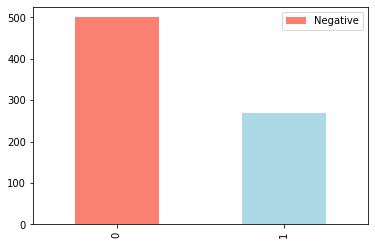

In [5]:
fig0=df['Target'].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);
fig0.legend(['Negative','Positive'])
fig0.get_figure().savefig("fig0.png")

In [6]:
per=(df.Target.value_counts()[1]/df.Target.count()*100)
print(f"percentage of diabetic people is {per} %")

percentage of diabetic people is 34.89583333333333 %


### **Comparing each feature with the other**:-

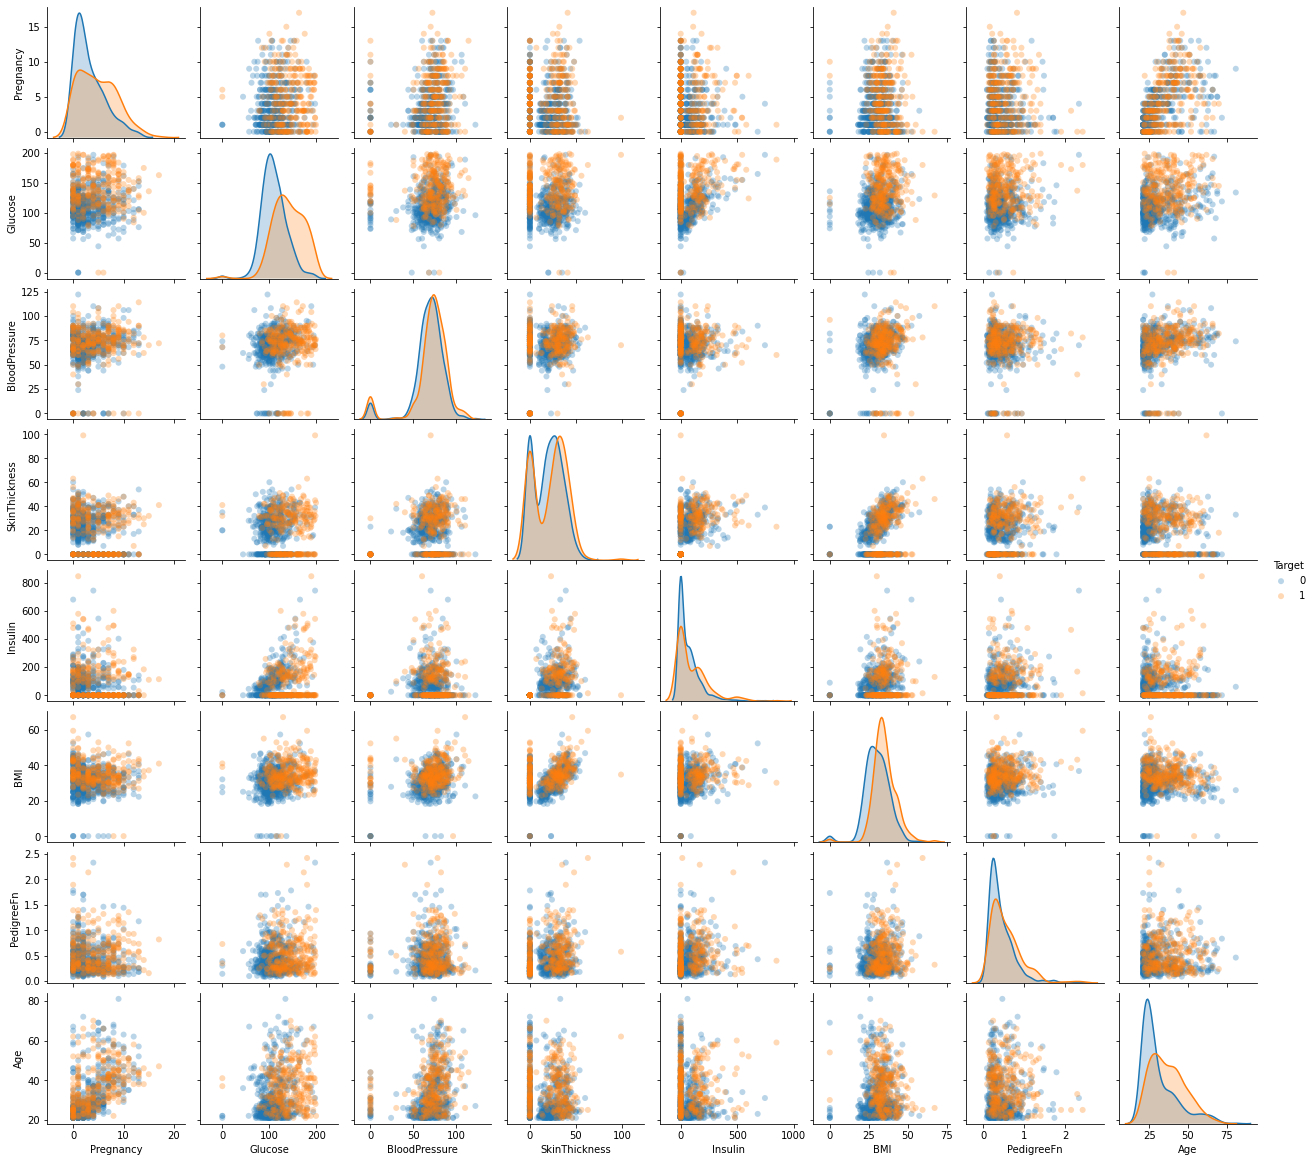

In [7]:
#to visualise pair plot
pairplot=sns.pairplot(df, hue='Target', plot_kws=dict(alpha=.3, edgecolor='none'), height=2, aspect=1.1);
pairplot.savefig("fig1.png")

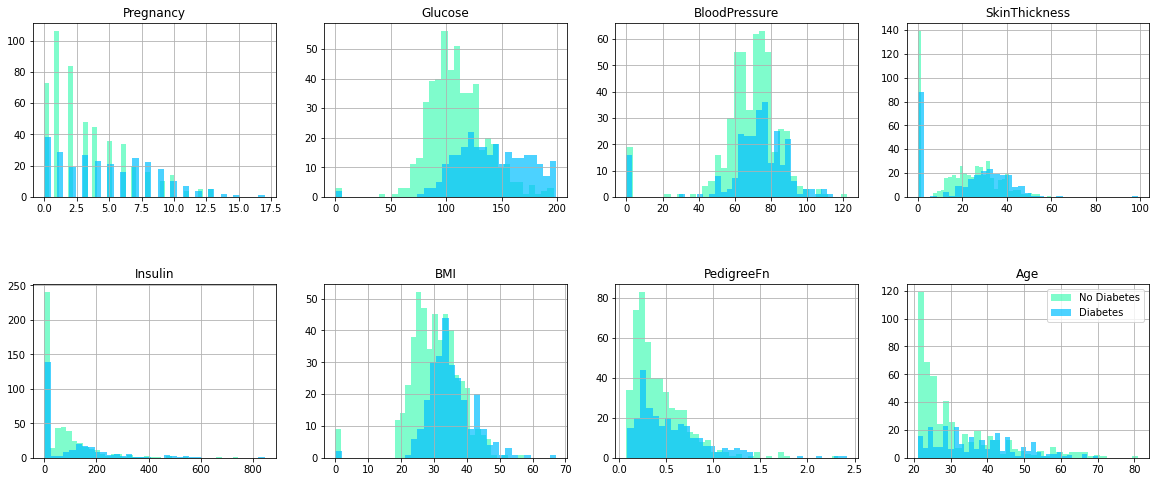

In [8]:
# To analyse feature-outcome distribution in visualisation
features = ['Pregnancy','Glucose','BloodPressure','SkinThickness','Insulin','BMI','PedigreeFn','Age']

ROWS, COLS = 2, 4
fig, ax = plt.subplots(ROWS, COLS, figsize=(20,8) )
row, col = 0, 0
for i, feature in enumerate(features):
    if col == COLS - 1:
        row += 1
    col = i % COLS
    
    # #plot all features wrt Target
    # df[feature].hist(color='red', bins=35, alpha=0.5, ax=ax[row, col]).set_title(feature)
    #plot negative patients wrt target
    df[df.Target==0][feature].hist( bins=35, color='mediumspringgreen', alpha=0.5, ax=ax[row, col]).set_title(feature)
    #plot positive patients wrt target
    df[df.Target==1][feature].hist( bins=35, color='deepskyblue', alpha=0.7, ax=ax[row, col])
    
plt.legend(['No Diabetes', 'Diabetes'])
fig.subplots_adjust(hspace=0.5)
plt.savefig("fig2.png")

### Finding correlation coefficient:-

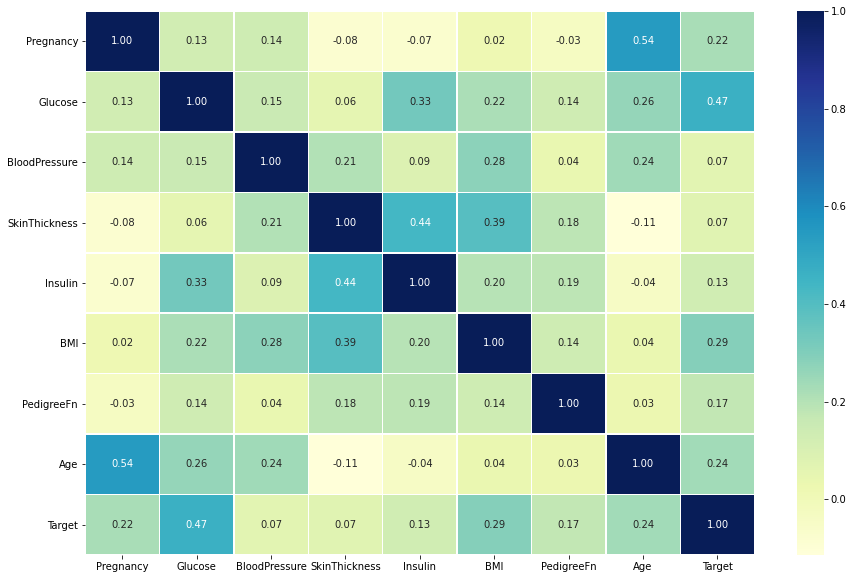

In [9]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
fig3=ax.get_figure()
fig3.savefig("fig3.png")

In [0]:
#Modelling
# Split data into X and y
X = df.drop("Target", axis=1)
y = df["Target"]

X_acc=X
y_acc=y

In [11]:
# Splitting data into train and test sets
np.random.seed(53)

# Here 25% data has been keep aside for testing, and model is trained on 75% data
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=.10)
 


print(X.shape,y.shape)                                               
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)


(768, 8) (768,)
(691, 8) (691,)
(77, 8) (77,)


Now, the training dataset will be fitted(trained) and tested on various estimators, to figure out which estimator yieds the best result...

In [12]:
# Put models in a dictionary
models = {
        #  "Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier(),
          "GaussianNB":GaussianNB(),
          "BernoulliNB":BernoulliNB(),
          "MultinomialNB":MultinomialNB(),
          "LinearSVC":LinearSVC(),
          "SVC":SVC(kernel='linear'),
          "XGBclassifier":XGBClassifier(),
          "DesicisonTreeClassifier":DecisionTreeClassifier()                                        
         }

# LassoCV, RidgeCV, ElasticNetCV
# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(53)
    # Make a dictionary to keep model scores
    train_model_scores = {}
    val_model_scores={}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        train_model_scores[name] = model.score(X_train, y_train)
        val_model_scores[name]=model.score(X_test,y_test)
    return train_model_scores,val_model_scores


model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)


model_scores 

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


({'BernoulliNB': 0.658465991316932,
  'DesicisonTreeClassifier': 1.0,
  'GaussianNB': 0.7626628075253257,
  'KNN': 0.8017366136034733,
  'LinearSVC': 0.6613603473227206,
  'MultinomialNB': 0.6049204052098408,
  'Random Forest': 1.0,
  'SVC': 0.7727930535455861,
  'XGBclassifier': 0.8914616497829233},
 {'BernoulliNB': 0.6103896103896104,
  'DesicisonTreeClassifier': 0.7142857142857143,
  'GaussianNB': 0.7402597402597403,
  'KNN': 0.7272727272727273,
  'LinearSVC': 0.6103896103896104,
  'MultinomialNB': 0.5844155844155844,
  'Random Forest': 0.7532467532467533,
  'SVC': 0.8051948051948052,
  'XGBclassifier': 0.7272727272727273})

***As visible, the SVC classifier has yielded the best results on the testing, while RandomForestClassifier has yielded the best result. However, RandomForestClassifier is overfitted since it has 100% accuracy on training data, while only 75.3% accuracy on testing data. Thus, SVC classifier will be used in future ....***

***Now, we will tune the hyperparameters to see how much improvement can be made out of each model...***

(**PS: I've used RandomizedSearchCV and less number of coefficient to tune the model, since some models take longer durations in GridSearchCV and still don't complete**)

In [0]:
#Defining grids for various estimators...

# Create a hyperparameter grid for KNNgrid
KNNgrid = {"leaf_size":[2],
           "n_neighbors":[25,26,27,28,29,20],
           "p":[1,2,3,4,5]}

# Create a hyperparameter grid for SVMClassifier
SVM_grid = {
            'kernel': ['linear'],
            # 'gamma': [0.8,1,0.6,0.4,0.2],
            'gamma': [0.8],
            'C': [0.1]
            }  

# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 500),
                "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
                
                }

#Create a hyperparameter grid for RandomForestClassifier
rf_grid={'n_estimators': [200],
         'max_depth' : [20],
         'min_samples_split' : [0.1],
         'min_samples_leaf' : [0,1],
         'max_features' : list(range(1,X_train.shape[1]))
         }


# Create a hyperparameter grid for Naive Bayes
NBgrid={"var_smoothing": np.logspace(100,-200, num=200)}


# Create a hyperparameter grid for XGBClassifier
XGBgrid={"eta"    : [0.10] ,
         "max_depth"        : [6,7,8,9,10],
         "min_child_weight" : [3,4,5],
         "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
        #  "colsample_bytree" : np.arange(0.5,1.1,0.1),
         "booster"          : ["gbtree"]
        #  "subsample"        : np.arange(0.5,1.1,0.1)
        }


In [0]:
# Tune LogisticRegression
np.random.seed(53)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=50,
                                n_jobs=-1,
                                verbose=True)
svc=GridSearchCV(SVC(),
                 param_grid=SVM_grid,
                 n_jobs=-1,
                 cv=5,
                 verbose=True)

rs_rf = RandomForestClassifier(n_estimators=200)

gs_KNN = GridSearchCV(KNeighborsClassifier(),
                            param_grid=KNNgrid,
                            cv=5,
                            n_jobs=-1,
                            verbose=True)
rs_NB=RandomizedSearchCV(GaussianNB(),
                    param_distributions=NBgrid,
                    cv=5,
                    n_iter=200,
                    n_jobs=-1,
                    verbose=True)

rs_XGB=RandomizedSearchCV(XGBClassifier(),
                    param_distributions=XGBgrid,
                    cv=5,
                    n_iter=50,
                    n_jobs=-1,
                    verbose=True)


**A function to tune all hyperparameters and calculate the accuracy of each estimator (parameters tuned)**

In [0]:
# show training and testing accuracy of various estimators used(after paramaters tuned)
tuned_models={
              "LRClassifier":rs_log_reg,
              "KNNClasifier":gs_KNN,
              "RandomForestclassifier":rs_rf,
              "GaussianNB":rs_NB,
              "SVCClassifier":svc,
              "XGBClassifier":rs_XGB
              }
def show_score(model,X_train,X_test,y_train,y_test):
  np.random.seed(67)
  training_model_scores={}
  testing_model_scores={}
 
  for key,value in model.items():
    value.fit(X_train,y_train)
    training_model_scores[key]=value.score(X_train,y_train)
    testing_model_scores[key]=value.score(X_test,y_test)
  
  return training_model_scores,testing_model_scores
    


In [16]:
tuned_model_results=show_score(model=tuned_models,
                               X_train=X_train,
                               X_test=X_test,
                               y_train=y_train,
                               y_test=y_test)
tuned_model_results

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 116 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    6.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    2.5s finished


Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 956 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    3.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.7s finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   17.0s finished


({'GaussianNB': 0.76410998552822,
  'KNNClasifier': 0.7800289435600579,
  'LRClassifier': 0.7785817655571635,
  'RandomForestclassifier': 1.0,
  'SVCClassifier': 0.7713458755426917,
  'XGBClassifier': 0.9942112879884226},
 {'GaussianNB': 0.7272727272727273,
  'KNNClasifier': 0.7532467532467533,
  'LRClassifier': 0.7922077922077922,
  'RandomForestclassifier': 0.7662337662337663,
  'SVCClassifier': 0.8181818181818182,
  'XGBClassifier': 0.7402597402597403})

- As visible, the SVC classifier has returned the highest accuracy on testing data (**81.81% which is our requirement**).

In [0]:
#Splitting the results of tuned models into training and testing scores
training_scores= tuned_model_results[0]
testing_scores= tuned_model_results[1]

#### Let's visualize the results returned by the tuning function ...

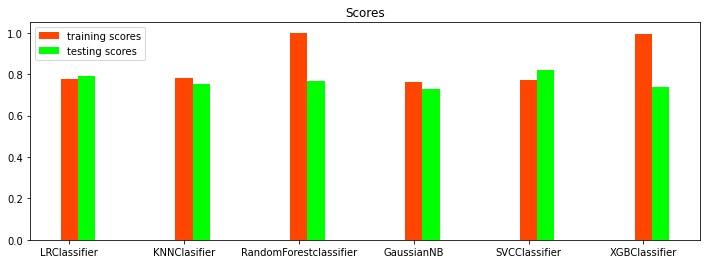

In [18]:
X=np.arange(len(training_scores))
plt.figure(figsize=(12,4))
ax=plt.subplot()
# plt.axhline(y=0.8,linestyle='--',linewidth=0.5, color='black')
ax.bar(X, training_scores.values(),width=0.15, color='orangered', align='center')
ax.bar(X+0.15, testing_scores.values(),width=0.15, color='lime', align='center')
ax.legend(('training scores','testing scores'))
plt.xticks(X, training_scores.keys())
plt.title("Scores")
plt.show();
ax.get_figure().savefig("fig4.png")

**Since SVC Classifier meets our requirements, we'll use SVC further.**

In [19]:
#Predicting data on our tuned model
y_preds=svc.predict(X_test)

#Comparing actual vs. predicted labels.
comp_df = pd.DataFrame({'Actual': np.array(y_test), 'Predicted': y_preds})
comp_df.head()

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,1,0


## Evaluation of our model:-

**We will evaluate our model using various pre-built evaluation metrics.
The following evaluation metrics have been used:**
- ROC curve & AUC score
- confusion matrix
- Classification report
- Cross-validated scores(Accuracy, Precision, Recall, f1)

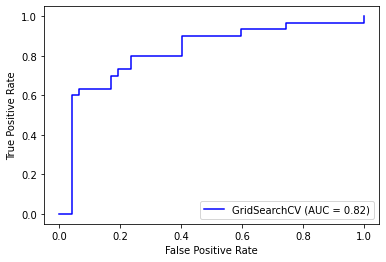

In [20]:
# Plot ROC curve and calculate and calculate AUC metric
plot_roc_curve(svc, X_test, y_test,color='blue')

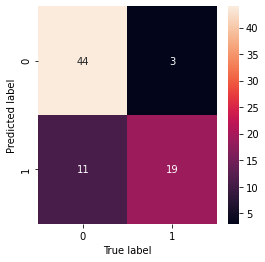

In [21]:
#Visualizing the confusion matrix
fig, ax = plt.subplots(figsize=(4,4))
ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                annot=True,
                cbar=True)
plt.xlabel("True label")
plt.ylabel("Predicted label")
    
bottom, top = ax.get_ylim()
fig6=ax.get_figure()
fig6.savefig("fig6.png")

In [22]:
#Getting a classification report of the confusion matrix

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.80      0.94      0.86        47
           1       0.86      0.63      0.73        30

    accuracy                           0.82        77
   macro avg       0.83      0.78      0.80        77
weighted avg       0.82      0.82      0.81        77



In [23]:
# Evaluating the model on the basis of precision, recall, f1-score, support
#Creating a new Estimator with best tuned hyperparameters
clf=SVC(C= 0.1,
        gamma= 1,
        kernel= 'linear')

# clf=LogisticRegression(C=843.0468371788967, solver ='newton-cg')
clf.fit(X_train,y_train)
print(clf.score(X_train,y_train),clf.score(X_test,y_test))
print(clf.predict(X_test))

0.7713458755426917 0.8181818181818182
[0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0
 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 1 1 0 0 1 0 0
 1 0 1]


**Calculating Cross-validated accuracy ..**

In [0]:
acc={"Accuracy metric":"accuracy",
     "Precision metric":"precision",
     "Recall metric":"recall",
     "f1 metric":"f1"}

def calc_accuracy(classifier,X,y,cv,acc):
  np.random.seed(69)
  acc_dict={}
  for key,value in acc.items():
    acc_dict[key]=cross_val_score(classifier,X,y,cv=cv,scoring=value,n_jobs=-1)
    acc_dict[key]=acc_dict[key].mean()

  return acc_dict
    
     


In [25]:
np.random.seed(47)
score=calc_accuracy(classifier=clf,X=X_test,y=y_preds ,cv=10,acc=acc)
# print(score)

acc_score=[]
for key,value in score.items():
  acc_score.append(value)
  print(f"{key} score is {value*100}%.")



Accuracy metric score is 92.5%.
Precision metric score is 90.0%.
Recall metric score is 86.66666666666666%.
f1 metric score is 86.66666666666666%.


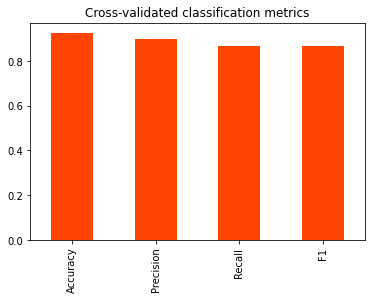

In [26]:
#visualizing accuracy

cv_metrics = pd.DataFrame({"Accuracy": acc_score[0],
                           "Precision": acc_score[1],
                           "Recall": acc_score[2],
                           "F1": acc_score[3]},
                          index=[0])

fig7=cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False, color="orangered");
            
fig7.get_figure().savefig("fig7.png")

#### Analyzing feature importance:-
Feature importance tells us how much has each column has contributed the most in achieving the accuracy score.
This helps the researchers to work on the parameter that has mostly-likely caused diabetes to a person.


In [27]:
clf.coef_.flatten()

array([ 1.14437026e-01,  2.98967906e-02, -1.06899295e-02, -3.36358785e-03,
       -4.64707918e-04,  7.09144869e-02,  5.47528407e-01,  4.03293405e-03])

In [28]:
feature_dict = dict(zip(df.columns, list((clf.coef_[0]*100))))
for key, value in feature_dict.items():
  print(f"The importance of {key} is {value}%.")


The importance of Pregnancy is 11.44370261248393%.
The importance of Glucose is 2.989679056817529%.
The importance of BloodPressure is -1.068992947172731%.
The importance of SkinThickness is -0.3363587848729921%.
The importance of Insulin is -0.04647079177466651%.
The importance of BMI is 7.091448692047919%.
The importance of PedigreeFn is 54.75284071484111%.
The importance of Age is 0.40329340465543595%.


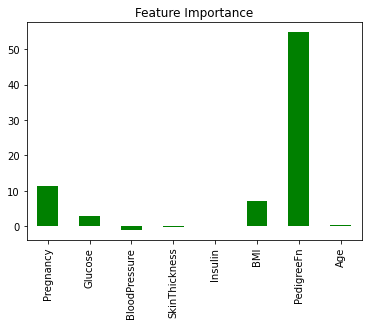

In [29]:
#Visualizing the features
feature_df = pd.DataFrame(feature_dict, index=[0])    
fig8=feature_df.T.plot.bar(title="Feature Importance", legend=False,color="green");
fig8.get_figure().savefig("fig8.png")

#### **Conclusion**:
From the above derivations and analysis, it can be concluded that PedigreeFunction(52.383250806853674%) has the most important in deciding if a person has diabetes. Also, Insulin levels plays an important in the classification process.

## ***Saving and reloading the model***...

In [30]:
saved_model_file="diabetes_classifier_model.pkl"
joblib.dump(clf,saved_model_file)

['diabetes_classifier_model.pkl']

In [0]:
#Reloading the model

# diabetes_classifier_model=joblib.load(saved_model_file)
# diabetes_classifier_model